In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import sys
sys.path.append('C:/Users/nicol/anaconda3/Lib/site-packages')
import openpyxl

#check screenshot for how to import right from a url

url = "https://www.cato.org/sites/cato.org/files/2021-12/HFI2021.json"
path = "/Users/nicol/Dropbox/Programming/HumanFreedomIndexProject/HFI2021.json"

df1 = pd.read_json(path)
# df1
# print(df1)

# list all columns
cols = list(df1.columns.values)
print(cols)

# big picture stats:
df1.describe()
# df1.info()
# to iterate through all rows - keep for later, just in case
# for index, row in df1.iterrows(): 
#     print(index, row)

['year', 'countries', 'ISO', 'region', 'hf_score', 'hf_rank', 'hf_quartile', 'pf_rol_procedural', 'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide', 'pf_ss_disappearances_disap', 'pf_ss_disappearances_violent', 'pf_ss_disappearances_organized', 'pf_ss_disappearances_fatalities', 'pf_ss_disappearances_injuries', 'pf_ss_disappearances_torture', 'pf_ss_killings', 'pf_ss_disappearances', 'pf_ss', 'pf_movement_vdem_foreign', 'pf_movement_vdem_men', 'pf_movement_vdem_women', 'pf_movement_vdem', 'pf_movement_cld', 'pf_movement', 'pf_religion_suppression', 'pf_religion_freedom_vdem', 'pf_religion_freedom_cld', 'pf_religion_freedom', 'pf_religion', 'pf_assembly_entry', 'pf_assembly_freedom_house', 'pf_assembly_freedom_bti', 'pf_assembly_freedom_cld', 'pf_assembly_freedom', 'pf_assembly_parties_barriers', 'pf_assembly_parties_bans', 'pf_assembly_parties_auton', 'pf_assembly_parties', 'pf_assembly_civil', 'pf_assembly', 'pf_assembly_rank', 'pf_expression_killed', 'pf_expression_jailed

,year,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
count,1980.000000,1867.000000,1867.000000,1867.000000,1249.000000,1249.000000,1249.000000,1980.000000,1976.000000,1957.000000,...,1732.000000,1845.000000,1857.000000,1911.000000,1836.000000,1853.000000,1863.000000,1880.000000,1867.000000,1867.000000
mean,2013.500000,7.190787,78.330477,2.510445,5.512842,5.532914,4.988943,5.130424,8.008148,8.469596,...,4.017979,5.293886,8.941174,5.765144,7.870626,6.935769,6.509152,7.042926,6.870279,78.237815
std,3.452925,1.176588,45.249298,1.119482,2.032690,1.330313,1.629103,1.603769,2.474640,3.049644,...,1.181790,2.562779,1.136564,2.401161,1.623539,2.028033,1.270069,1.043629,0.946626,45.265043
min,2008.000000,3.490000,1.000000,1.000000,1.000000,1.890000,1.290000,1.110000,0.000000,0.000000,...,0.000000,0.000000,0.780000,0.000000,0.000000,0.000000,1.980000,2.500000,2.670000,1.000000
25%,2010.750000,6.360000,39.000000,2.000000,4.030000,4.550000,3.720000,3.930000,7.460000,10.000000,...,3.220000,3.330000,8.660000,3.790000,7.150000,6.330000,5.710000,6.460000,6.230000,39.000000
50%,2013.500000,7.240000,78.000000,3.000000,5.130000,5.340000,4.550000,4.790000,8.985000,10.000000,...,3.985000,5.330000,9.340000,5.710000,8.240000,7.430000,6.580000,7.130000,6.980000,78.000000
75%,2016.250000,8.195000,117.000000,4.000000,7.270000,6.360000,6.160000,6.360000,9.600000,10.000000,...,4.710000,7.330000,9.660000,7.660000,9.070000,8.240000,7.360000,7.750000,7.605000,117.000000
max,2019.000000,9.150000,165.000000,4.000000,9.670000,8.770000,8.720000,8.830000,9.950000,10.000000,...,7.690000,10.000000,9.980000,10.000000,10.000000,9.930000,9.450000,9.430000,9.090000,165.000000


In [232]:
df2 = df1.sort_values("region", ascending=True)
df2[cols].dtypes

year                                   int64
countries                             object
ISO                                   object
region                                object
hf_score                             float64
                                      ...   
ef_regulation_business_compliance    float64
ef_regulation_business               float64
ef_regulation                        float64
ef_score                             float64
ef_rank                              float64
Length: 125, dtype: object

In [233]:
# worldwide averages by region

(df1.groupby("region")
    .mean()
    .sort_values("hf_score", ascending = False))

,year,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
region,,,,,,,,,,,,,,,,,,,,,
North America,2013.5,8.832083,9.666667,1.000000,7.932083,6.812917,6.939583,7.229167,9.037500,10.000000,...,4.663333,8.183333,9.853750,9.243333,8.671667,8.336667,8.157917,8.707917,8.202917,6.875000
Western Europe,2013.5,8.732685,15.291667,1.000000,8.582179,7.470256,7.466218,7.821806,9.701806,9.814815,...,4.299861,7.323657,9.574413,9.103611,8.429155,8.465634,7.842315,7.789722,7.836250,24.828704
Oceania,2013.5,8.067292,43.625000,1.812500,8.505000,7.575000,7.444167,5.980833,8.964375,10.000000,...,4.432069,7.359091,9.112292,6.789792,8.517500,8.053750,7.524583,8.411042,7.472292,52.166667
Eastern Europe,2013.5,7.961133,48.570312,1.761719,6.230637,5.646667,5.145441,5.800909,9.146364,9.386973,...,3.412659,6.738945,9.456992,6.543220,7.317843,7.074453,6.771445,7.429336,7.317734,55.500000
East Asia,2013.5,7.950139,47.500000,1.708333,6.443833,6.578500,6.358667,6.525278,9.498750,8.500000,...,4.691528,7.579583,9.521389,7.110694,8.623472,7.650833,7.529444,7.645000,7.603472,45.041667
Latin America & the Caribbean,2013.5,7.474968,67.300000,2.203226,5.310741,4.944321,3.887284,4.712372,4.536378,8.974359,...,3.325828,4.930888,8.526189,5.692188,7.535472,6.040623,6.079097,6.760935,6.896419,75.329032
Caucasus & Central Asia,2013.5,6.797714,95.514286,2.914286,4.651212,5.309091,4.580303,4.380972,8.891944,9.027778,...,4.874714,5.736143,9.669429,4.507917,8.489714,6.874143,6.700714,7.294714,7.049286,71.542857
South Asia,2013.5,6.579037,105.037433,3.219251,4.251974,4.612632,4.571645,4.520539,9.082353,6.675000,...,4.309492,5.388490,8.749344,4.808906,8.041093,6.808407,6.418907,7.003194,6.673262,93.449198
Sub-Saharan Africa,2013.5,6.512516,107.069182,3.228512,3.904803,4.916339,4.076772,4.112407,7.388494,8.199627,...,4.140875,3.492916,8.352264,4.780966,7.525042,6.365252,5.833396,6.531728,6.181363,112.754717


In [234]:
# single condition:
df3 = (df1.sort_values("hf_score", ascending=False)
    .loc[df1["region"] == "Middle East & North Africa"])

df3

,year,countries,ISO,region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,...,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
1064,2013,Israel,ISR,Middle East & North Africa,7.71,56.0,2.0,NaN,NaN,NaN,...,3.09,8.44,9.55,7.83,7.51,7.37,7.30,7.40,7.50,44.0
734,2015,Israel,ISR,Middle East & North Africa,7.67,58.0,2.0,NaN,NaN,NaN,...,4.48,8.44,9.58,7.63,7.51,7.37,7.50,7.49,7.60,42.0
569,2016,Israel,ISR,Middle East & North Africa,7.66,58.0,2.0,NaN,NaN,NaN,...,4.61,8.22,9.58,7.63,7.51,7.37,7.49,7.50,7.58,47.0
74,2019,Israel,ISR,Middle East & North Africa,7.66,62.0,2.0,NaN,NaN,NaN,...,4.22,8.22,9.62,7.45,7.65,7.38,7.42,7.42,7.63,43.0
404,2017,Israel,ISR,Middle East & North Africa,7.64,59.0,2.0,NaN,NaN,NaN,...,4.45,8.22,9.59,6.77,7.54,7.45,7.34,7.43,7.59,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1901,2008,Lebanon,LBN,Middle East & North Africa,NaN,NaN,NaN,6.43,4.54,4.86,...,NaN,NaN,NaN,3.50,NaN,NaN,NaN,NaN,NaN,NaN
1904,2008,Libya,LBY,Middle East & North Africa,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.10,NaN,NaN,NaN,NaN,NaN,NaN
1939,2008,Qatar,QAT,Middle East & North Africa,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.90,NaN,NaN,NaN,NaN,NaN,NaN
1943,2008,Saudi Arabia,SAU,Middle East & North Africa,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.36,NaN,NaN,NaN,NaN,NaN,NaN


In [235]:
#multiple conditions:
df4 = df1.loc[(df1["region"] == "Middle East & North Africa")
    & (df1["year"] == 2019)]
df4


,year,countries,ISO,region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,...,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
1,2019,Algeria,DZA,Middle East & North Africa,5.26,154.0,4.0,5.21,5.64,4.35,...,4.22,2.22,9.31,2.58,8.77,7.03,5.69,5.84,4.90,162.0
9,2019,Bahrain,BHR,Middle East & North Africa,5.73,143.0,4.0,NaN,NaN,NaN,...,6.06,8.00,9.71,2.41,9.76,9.75,7.61,7.71,7.33,65.0
46,2019,"Egypt, Arab Rep.",EGY,Middle East & North Africa,4.49,161.0,4.0,2.52,3.87,3.74,...,4.03,3.56,9.39,2.29,8.10,5.85,5.53,5.43,5.68,149.0
71,2019,"Iran, Islamic Rep.",IRN,Middle East & North Africa,4.53,160.0,4.0,2.49,5.52,3.72,...,2.40,0.00,7.67,5.67,8.79,7.58,5.35,5.50,5.06,160.0
72,2019,Iraq,IRQ,Middle East & North Africa,5.02,157.0,4.0,NaN,NaN,NaN,...,NaN,0.00,8.74,1.67,8.20,6.50,5.02,6.91,5.74,148.0
74,2019,Israel,ISR,Middle East & North Africa,7.66,62.0,2.0,NaN,NaN,NaN,...,4.22,8.22,9.62,7.45,7.65,7.38,7.42,7.42,7.63,43.0
78,2019,Jordan,JOR,Middle East & North Africa,6.91,94.0,3.0,5.00,6.21,5.68,...,4.64,5.56,9.35,5.12,9.82,8.92,7.23,7.90,7.59,50.0
82,2019,Kuwait,KWT,Middle East & North Africa,6.34,121.0,3.0,NaN,NaN,NaN,...,4.83,2.44,9.36,4.94,9.23,8.90,6.62,7.38,6.72,98.0
86,2019,Lebanon,LBN,Middle East & North Africa,6.76,108.0,3.0,4.80,4.20,3.46,...,3.55,0.89,8.94,3.64,6.40,7.97,5.23,6.46,6.76,95.0
89,2019,Libya,LBY,Middle East & North Africa,5.05,156.0,4.0,NaN,NaN,NaN,...,4.27,0.00,8.52,0.77,NaN,0.03,2.72,6.00,4.79,163.0


In [236]:
# dfme = (df1.loc[df1["region"] == "Middle East & North Africa"]
#     .sort_values("hf_score", ascending=False)
#         .drop(columns=['region']))
#     # .groupby(["countries"]).mean())

dfme = (df1[['year', 'countries', 'region', 'hf_score', 'hf_rank', 'pf_score', 'ef_score']]
       .loc[df2["region"] == "Middle East & North Africa"]
       .sort_values(["year", "hf_score"], ascending=False))
dfme

,year,countries,region,hf_score,hf_rank,pf_score,ef_score
74,2019,Israel,Middle East & North Africa,7.66,62.0,7.69,7.63
78,2019,Jordan,Middle East & North Africa,6.91,94.0,6.42,7.59
86,2019,Lebanon,Middle East & North Africa,6.76,108.0,6.76,6.76
152,2019,Tunisia,Middle East & North Africa,6.46,116.0,6.82,5.97
82,2019,Kuwait,Middle East & North Africa,6.34,121.0,6.07,6.72
...,...,...,...,...,...,...,...
1901,2008,Lebanon,Middle East & North Africa,NaN,NaN,6.14,NaN
1904,2008,Libya,Middle East & North Africa,NaN,NaN,4.74,NaN
1939,2008,Qatar,Middle East & North Africa,NaN,NaN,5.20,NaN
1943,2008,Saudi Arabia,Middle East & North Africa,NaN,NaN,3.72,NaN


In [237]:
# worldwide averages by country
# 
dfscores = (df1[['year', 'countries', 'hf_score', 'ef_score', 'pf_score']]
    .groupby(["countries"]).mean()
    .sort_values("hf_score", ascending=False))
dfscores

,year,hf_score,ef_score,pf_score
countries,,,,
New Zealand,2013.5,9.081667,8.487500,9.502500
Switzerland,2013.5,9.075833,8.470000,9.510000
Denmark,2013.5,8.987500,8.068333,9.642500
Ireland,2013.5,8.905833,8.126667,9.464167
Australia,2013.5,8.904167,8.180000,9.420000
...,...,...,...,...
"Egypt, Arab Rep.",2013.5,4.786667,5.674167,4.153333
"Venezuela, RB",2013.5,4.748333,3.333333,5.761667
"Iran, Islamic Rep.",2013.5,4.739167,5.414167,4.256667


In [238]:
# worldwide averages by year

(df1[['year', 'countries', 'hf_score', 'ef_score', 'pf_score']]
    .groupby(["year"]).mean()
    .sort_values("hf_score", ascending=False))


,hf_score,ef_score,pf_score
year,,,
2008,7.302837,6.818369,7.354512
2009,7.287163,6.823191,7.332256
2011,7.239804,6.854967,7.376606
2010,7.236601,6.821307,7.391333
2012,7.222092,6.856405,7.355152
2013,7.181911,6.853057,7.312970
2014,7.173899,6.891069,7.285818
2018,7.151420,6.922531,7.270182
2015,7.150629,6.881069,7.254424


In [239]:
dfmedia = df1.loc[(df1["pf_expression_internet"] > 9) & (df1["pf_expression_media"] > 9)]
dfmedia

,year,countries,ISO,region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,...,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
11,2019,Barbados,BRB,Latin America & the Caribbean,7.92,51.0,2.0,7.28,6.43,5.74,...,3.26,6.89,9.41,7.44,5.00,7.30,6.55,7.62,6.91,87.0
13,2019,Belgium,BEL,Western Europe,8.61,23.0,1.0,8.80,7.59,7.07,...,3.50,8.44,9.78,9.53,7.46,8.48,7.87,8.12,7.62,45.0
25,2019,Cabo Verde,CPV,Sub-Saharan Africa,8.26,36.0,1.0,NaN,NaN,NaN,...,4.53,6.00,9.58,6.40,9.27,7.98,7.29,7.33,7.65,41.0
28,2019,Canada,CAN,North America,8.85,6.0,1.0,8.71,7.04,7.41,...,4.83,8.00,9.95,8.55,6.85,8.53,7.79,8.62,8.06,14.0
31,2019,Chile,CHL,Latin America & the Caribbean,8.44,28.0,1.0,7.68,6.31,5.60,...,4.02,7.78,9.84,7.46,7.74,6.68,7.25,7.03,7.85,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1957,2008,Sweden,SWE,Western Europe,8.83,11.0,1.0,9.50,7.78,8.23,...,4.99,1.92,9.42,9.65,8.84,8.63,7.24,7.46,7.70,26.0
1958,2008,Switzerland,CHE,Western Europe,9.07,2.0,1.0,NaN,NaN,NaN,...,5.46,7.79,9.25,9.52,8.32,9.29,8.27,8.49,8.41,4.0
1966,2008,Trinidad and Tobago,TTO,Latin America & the Caribbean,7.47,63.0,2.0,NaN,NaN,NaN,...,3.95,5.35,8.62,6.50,6.65,8.72,6.63,7.48,7.26,53.0
1973,2008,United States,USA,North America,8.87,7.0,1.0,7.27,6.53,6.54,...,3.99,7.01,9.80,9.50,9.98,7.90,8.03,8.69,8.37,5.0


In [240]:
dfmedia[dfmedia.columns[0:5]].dropna()

,year,countries,ISO,region,hf_score
11,2019,Barbados,BRB,Latin America & the Caribbean,7.92
13,2019,Belgium,BEL,Western Europe,8.61
25,2019,Cabo Verde,CPV,Sub-Saharan Africa,8.26
28,2019,Canada,CAN,North America,8.85
31,2019,Chile,CHL,Latin America & the Caribbean,8.44
...,...,...,...,...,...
1957,2008,Sweden,SWE,Western Europe,8.83
1958,2008,Switzerland,CHE,Western Europe,9.07
1966,2008,Trinidad and Tobago,TTO,Latin America & the Caribbean,7.47
1973,2008,United States,USA,North America,8.87


In [241]:
# find out if any countries have dropped enough in score to skew the worldwide mean so that it looks like a slight downward trend

    # this section is me trying to figure out how to isolate the 2018 and 2019 hf_score values
    # the next section is me trying to find the difference between them

# dfdec = ((df1[['year', 'countries', 'region', 'hf_score', 'hf_rank', 'pf_score', 'ef_score']]
#     .loc[((df1["pf_score"] < 5) & ((df1["year"] == 2019) | (df1["year"] == 2018)))
#          | ((df1["ef_score"] < 5) & ((df1["year"] == 2019) | (df1["year"] == 2018)))].sort_values("countries")))
# dfdec


# df2019 = ((df1[['year', 'countries', 'region', 'hf_score', 'hf_rank', 'pf_score', 'ef_score']]
#           .loc[((df1["pf_score"] < 5) & (df1["year"] == 2019))
#                | ((df1["ef_score"] < 5) & (df1["year"] == 2019))].sort_values("countries")))
# df2019

# df2018 = ((df1[['year', 'countries', 'region', 'hf_score', 'hf_rank', 'pf_score', 'ef_score']]
#            .loc[((df1["pf_score"] < 5) & (df1["year"] == 2018))
#                | ((df1["ef_score"] < 5) & (df1["year"] == 2018))].sort_values("countries")))
# df2018


df2019 = ((df1[['year', 'countries', 'region', 'hf_score', 'hf_rank', 'pf_score', 'ef_score']]
           .loc[(df1["year"] == 2019)]
             .sort_values("countries")))
df2019

df2018 = ((df1[['year', 'countries', 'region', 'hf_score', 'hf_rank', 'pf_score', 'ef_score']]
           .loc[(df1["year"] == 2018)]
             .sort_values("countries")))
df2018


,year,countries,region,hf_score,hf_rank,pf_score,ef_score
165,2018,Albania,Eastern Europe,8.16,42.0,8.43,7.78
166,2018,Algeria,Middle East & North Africa,5.21,152.0,5.48,4.83
167,2018,Angola,Sub-Saharan Africa,5.80,136.0,6.48,4.86
168,2018,Argentina,Latin America & the Caribbean,7.57,65.0,8.77,5.88
169,2018,Armenia,Caucasus & Central Asia,8.01,47.0,8.06,7.94
...,...,...,...,...,...,...,...
325,2018,"Venezuela, RB",Latin America & the Caribbean,4.25,159.0,4.93,3.31
326,2018,Vietnam,South Asia,5.91,131.0,5.68,6.24
327,2018,"Yemen, Rep.",Middle East & North Africa,4.07,160.0,3.10,5.44
328,2018,Zambia,Sub-Saharan Africa,7.00,93.0,6.85,7.20


In [242]:
# figure out the transpose function to switch columns and rows?



In [243]:
#show list of Middle Eastern country names for the line graph in the next section
dfme.groupby("countries").mean()

,year,hf_score,hf_rank,pf_score,ef_score
countries,,,,,
Algeria,2013.5,5.238333,147.583333,5.400833,5.009167
Bahrain,2013.5,5.821667,133.416667,4.850833,7.180833
"Egypt, Arab Rep.",2013.5,4.786667,151.250000,4.153333,5.674167
"Iran, Islamic Rep.",2013.5,4.739167,152.583333,4.256667,5.414167
Iraq,2013.5,5.025000,154.500000,4.609167,5.587500
Israel,2013.5,7.574167,62.833333,7.650000,7.470833
Jordan,2013.5,6.852500,98.666667,6.420833,7.459167
Kuwait,2013.5,6.352500,117.083333,6.082500,6.730000
Lebanon,2013.5,6.836000,100.600000,6.580000,7.084000


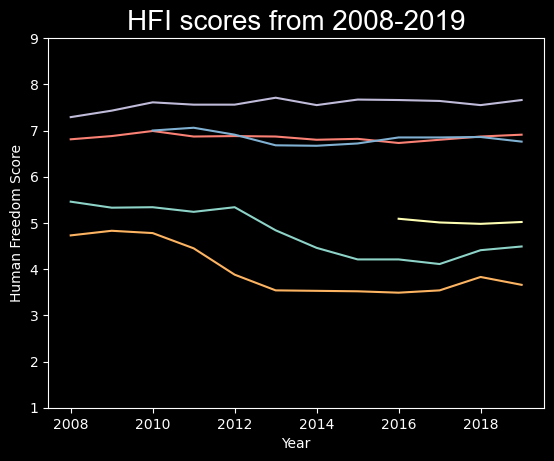

In [244]:
# plot ME countries

dfmeE = (dfme[["year", "countries", "hf_score"]]
    .loc[(dfme["countries"] == "Egypt, Arab Rep.")])

dfmeI = (dfme[["year", "countries", "hf_score"]]
         .loc[(dfme["countries"] == "Israel")])

dfmeJ = (dfme[["year", "countries", "hf_score"]]
         .loc[(dfme["countries"] == "Jordan")])

dfmeL = (dfme[["year", "countries", "hf_score"]]
         .loc[(dfme["countries"] == "Lebanon")])

dfmeS = (dfme[["year", "countries", "hf_score"]]
         .loc[(dfme["countries"] == "Syrian Arab Republic")])

dfmeIR = (dfme[["year", "countries", "hf_score"]]
         .loc[(dfme["countries"] == "Iraq")])

xE = dfmeE["year"]
yE = dfmeE["hf_score"]
xIR = dfmeIR["year"]
yIR = dfmeIR["hf_score"]
xI = dfmeI["year"]
yI = dfmeI["hf_score"]
xJ = dfmeJ["year"]
yJ = dfmeJ["hf_score"]
xL = dfmeL["year"]
yL = dfmeL["hf_score"]
xS = dfmeS["year"]
yS = dfmeS["hf_score"]

plt.plot(xE, yE, label="Egypt")
plt.plot(xIR, yIR, label="Iraq")
plt.plot(xI, yI, label="Israel")
plt.plot(xJ, yJ, label="Jordan")
plt.plot(xL, yL, label="Lebanon")
plt.plot(xS, yS, label="Syria")

plt.title("HFI scores from 2008-2019", fontdict = {"fontname": "Arial", "fontsize": 20})
plt.xlabel("Year")
plt.ylabel("Human Freedom Score")

# plt.xticks([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])
plt.yticks([1,2,3,4,5,6,7,8,9])
# plt.legend()
fig = matplotlib.pyplot.gcf()
fig.savefig('mehfiline.png', dpi=300)

plt.show()


In [245]:
# # attempt to plot ME countries more effectively

# # country = ["Algeria", "Bahrain", "Egypt, Arab Rep.", "Iran, Islamic Rep.", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Libya", "Morocco", "Oman",
# #     "Qatar", "Saudi Arabia", "Syrian Arab Republic", "Tunisia", "Turkey", "United Arab Emirates", "Yemen, Rep."]

# for countries in dfme:
#     x = dfme["year"]
#     y = dfme["hf_score"]
#     plt.scatter(x, y)
#     plt.plot(x, y)
#     # plt.legend(dfme.loc[(dfme["countries"])])

# plt.title("HFI scores from 2008-2019",
#           fontdict={"fontname": "Arial", "fontsize": 20})
# plt.xlabel("Year")
# plt.ylabel("Human Freedom Score")

# # plt.xticks([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])
# plt.yticks([2, 3, 4, 5, 6, 7, 8, 9])
# # plt.legend()
# fig = matplotlib.pyplot.gcf()
# fig.savefig('mehfiline2.png', dpi=300)

# plt.show()


In [246]:
# pivot tables

dfme = (df1[['year', 'countries', 'region', 'hf_score']]
        .loc[df2["region"] == "Middle East & North Africa"]
        .sort_values(["year", "countries"], ascending=False))

dfmepivot = pd.pivot_table(data=dfme, index=['countries', 'year'])
dfmepivot


dfmepivot2 = pd.pivot_table(
    data=dfme, index=['year'], columns=["countries"])
dfmepivot2


hf_score                                                           \
countries  Algeria Bahrain Egypt, Arab Rep. Iran, Islamic Rep.  Iraq Israel   
year                                                                          
2008          5.36    6.76             5.46               4.98   NaN   7.29   
2009          5.27    6.66             5.33               4.83   NaN   7.43   
2010          5.30    6.53             5.34               4.77   NaN   7.61   
2011          5.31    5.65             5.24               4.72   NaN   7.56   
2012          5.24    5.49             5.34               4.62   NaN   7.56   
2013          5.22    5.51             4.84               4.69   NaN   7.71   
2014          5.19    5.49             4.46               4.62   NaN   7.55   
2015          5.16    5.47             4.21               4.71   NaN   7.67   
2016          5.16    5.47             4.21               4.84  5.09   7.66   
2017          5.18    5.48             4.11               4.92  5.01   7.64   
2018          5.21    5.62             4.41               4.64  4.98   7.55   
2019          5.26    5.73             4.49               4.53  5.02   7.66   

                                                                        \
countries Jordan Kuwait Lebanon Libya Morocco  Oman Qatar Saudi Arabia   
year                                                                     
2008        6.81   6.65     NaN   NaN    6.15  6.10   NaN          NaN   
2009        6.88   6.63     NaN   NaN    6.19  6.06   NaN          NaN   
2010        6.99   6.47    7.00   NaN    6.23  6.02  6.19         5.16   
2011        6.87   6.39    7.06   NaN    6.14  5.89  6.05         4.90   
2012        6.88   6.40    6.91   NaN    6.11  5.94  6.21         4.86   
2013        6.87   6.33    6.68  5.31    6.09  5.92  6.25         4.95   
2014        6.80   6.23    6.67  5.11    6.06  5.99  6.25         4.85   
2015        6.82   6.05    6.72  5.11    6.12  5.85  6.18         4.68   
2016        6.73   6.26    6.85  5.10    6.00  5.92  6.17         4.88   
2017        6.80   6.21    6.85  5.06    5.93  5.90  6.09         4.91   
2018        6.87   6.27    6.86  5.14    5.99  5.91  6.10         4.92   
2019        6.91   6.34    6.76  5.05    5.90  5.92  6.15         5.12   

                                                                                
countries Syrian Arab Republic Tunisia Turkey United Arab Emirates Yemen, Rep.  
year                                                                            
2008                      4.73    5.52   7.01                 6.26         NaN  
2009                      4.83    5.48   7.06                 6.20         NaN  
2010                      4.78    5.40   7.02                 6.28        5.54  
2011                      4.45    6.68   7.04                 6.21        5.31  
2012                      3.88    6.56   6.90                 6.21        5.57  
2013                      3.54    6.52   6.75                 6.16        5.45  
2014                      3.53    6.60   6.61                 6.08        5.16  
2015                      3.52    6.51   6.45                 6.00        4.53  
2016                      3.49    6.52   6.11                 6.11        4.59  
2017                      3.54    6.55   5.74                 5.95        4.31  
2018                      3.83    6.49   5.85                 6.00        4.07  
2019                      3.66    6.46   5.79                 6.06        4.08

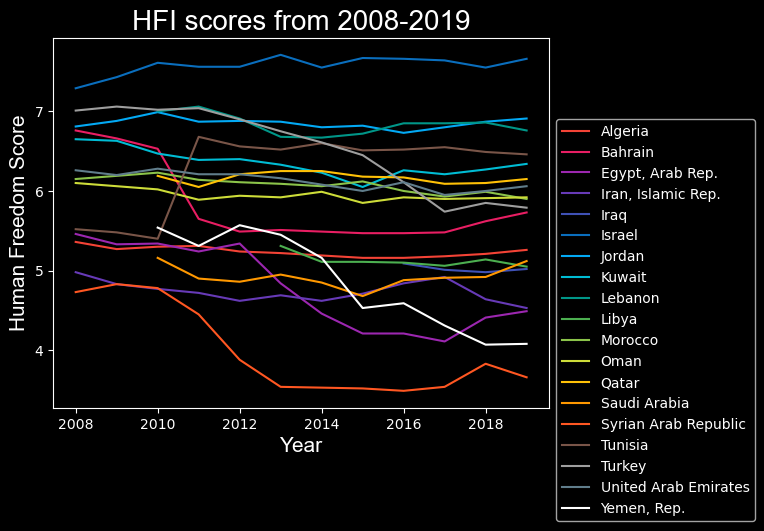

In [247]:
# attempt 2 to plot ME countries more effectively
#solve difference problem with pivot table



# dfdec["hfdiff"] = dfregionpivot["2018"] - dfregionpivot["2019"]

labels = ["Algeria", "Bahrain", "Egypt, Arab Rep.", "Iran, Islamic Rep.", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Libya", "Morocco", "Oman", 
    "Qatar", "Saudi Arabia", "Syrian Arab Republic", "Tunisia", "Turkey", "United Arab Emirates", "Yemen, Rep."]

colors = ['#f44336', '#e81e63', '#9c27b0', '#673ab7', '#3f51b5', '#0a6ebd', '#03a9f4', '#00bcd4', '#009688', '#4caf50',
          '#8bc34a', '#cddc39', '#ffc107', '#ff9800', '#ff5722', '#795548', '#9e9e9e', '#607d8b', '#ffffff']

ax = dfmepivot2.plot(color=colors)

ax.legend(bbox_to_anchor=(1.0, 0.8), labels=labels)
# plt.style.use("signature_style_1.ipynb")

plt.title("HFI scores from 2008-2019",
          fontdict={"fontname": "Arial", "fontsize": 20})
plt.xlabel("Year", fontdict={"fontname": "Arial", "fontsize": 15})
plt.ylabel("Human Freedom Score", fontdict={
           "fontname": "Arial", "fontsize": 15})
fig.savefig('mehfiline2.png', dpi=300)

plt.show()


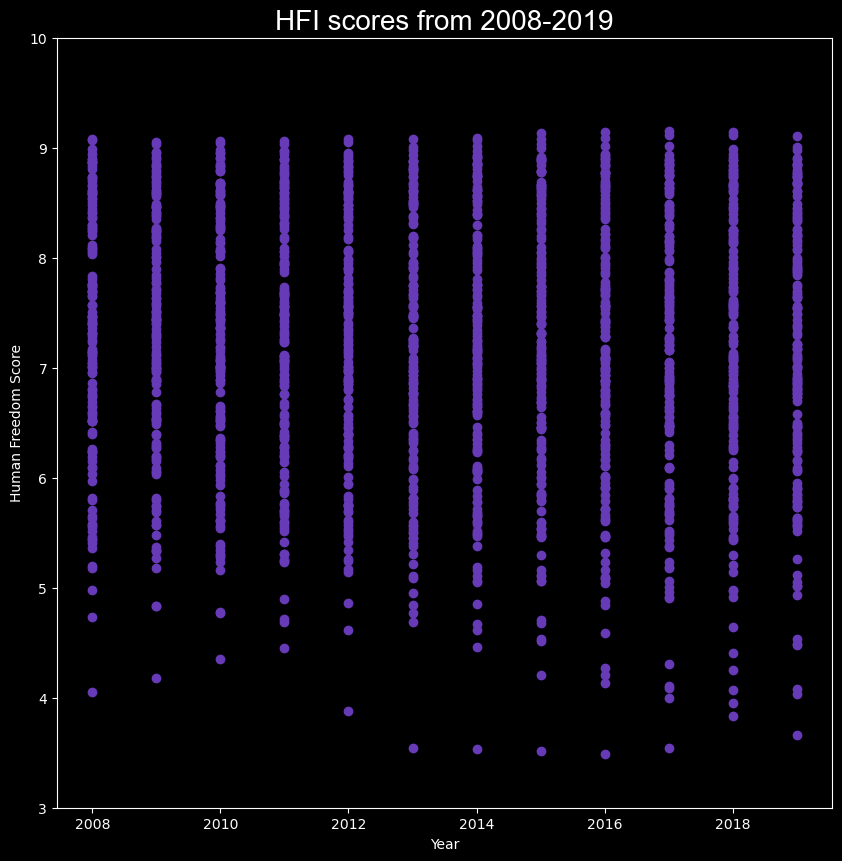

In [248]:
# this is interesting. Try a box and whisker chart to follow up on the lower outliers.

plt.scatter(df1["year"], df1["hf_score"], color="#673ab7")

plt.title("HFI scores from 2008-2019",
          fontdict={"fontname": "Arial", "fontsize": 20})
plt.xlabel("Year")
plt.ylabel("Human Freedom Score")

# plt.xticks([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])
plt.yticks([3, 4, 5, 6, 7, 8, 9, 10])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 10)
fig.savefig('hfiscatter.png', dpi=300)

plt.show()


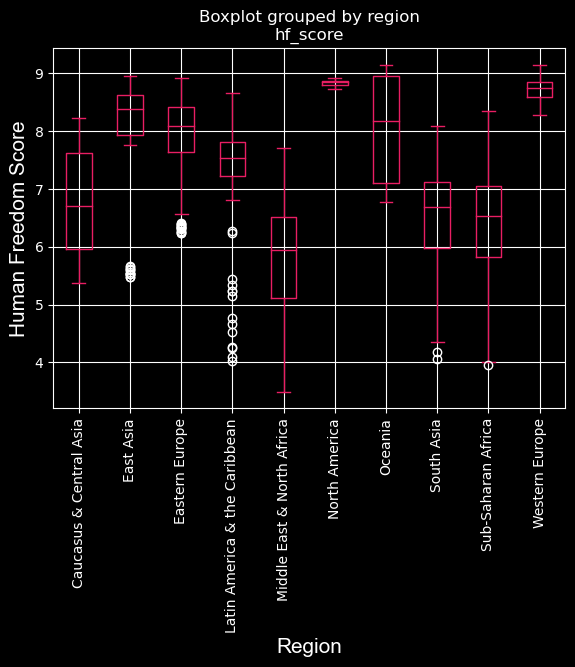

In [249]:
# box and whiskers plot

df1.boxplot(column=['hf_score'], by='region', color="#e81e63")
# plt.title("HFI scores from 2008-2019",
#           fontdict={"fontname": "Arial", "fontsize": 20})
plt.xlabel("Region", fontdict={"fontname": "Arial", "fontsize": 15})
plt.ylabel("Human Freedom Score", fontdict={
           "fontname": "Arial", "fontsize": 15})
plt.xticks(rotation=90)

fig.savefig('regionhfibox.png', dpi=300)

plt.show()


In [250]:
#solve difference problem with pivot table

dfregion = (df1[["year", "countries", "region", "hf_score"]]
            .sort_values(["year", "region"], ascending=False))
dfregion

dfregionpivot = pd.pivot_table(data=dfregion, index=['year'], columns=["region"])
dfregionpivot

# dfdec["hfdiff"] = dfregionpivot["2018"] - dfregionpivot["2019"]

hf_score                           \
region Caucasus & Central Asia East Asia Eastern Europe   
year                                                      
2008                  6.864000  7.905000       7.984762   
2009                  6.774000  7.928333       7.980476   
2010                  6.640000  7.958333       8.015238   
2011                  6.628333  7.953333       8.023810   
2012                  6.696667  7.940000       8.002381   
2013                  6.711667  7.925000       7.967619   
2014                  6.838333  7.930000       7.997143   
2015                  6.798333  7.913333       7.947619   
2016                  6.813333  7.928333       7.895909   
2017                  6.856667  8.030000       7.901818   
2018                  6.953333  8.026667       7.902727   
2019                  7.005000  7.963333       7.924545   

                                                                               \
region Latin America & the Caribbean Middle East & North Africa North America   
year                                                                            
2008                        7.526400                   6.083077         8.865   
2009                        7.500400                   6.065385         8.800   
2010                        7.505385                   6.037059         8.820   
2011                        7.514231                   5.968824         8.790   
2012                        7.483846                   5.922353         8.805   
2013                        7.446154                   5.821667         8.835   
2014                        7.450385                   5.736111         8.890   
2015                        7.437692                   5.653333         8.890   
2016                        7.431154                   5.640000         8.870   
2017                        7.481154                   5.588421         8.840   
2018                        7.482308                   5.616316         8.790   
2019                        7.443462                   5.625789         8.790   

                                                             
region Oceania South Asia Sub-Saharan Africa Western Europe  
year                                                         
2008    8.1000   6.472500           6.519143       8.725556  
2009    8.0775   6.483333           6.514571       8.687778  
2010    8.0775   6.610000           6.520526       8.702222  
2011    8.0525   6.651333           6.530526       8.730000  
2012    8.0475   6.646000           6.507105       8.727222  
2013    8.0000   6.629375           6.526500       8.735000  
2014    8.0275   6.538824           6.538537       8.778333  
2015    8.0475   6.550000           6.530488       8.753889  
2016    8.0525   6.571765           6.477857       8.753889  
2017    8.0950   6.571765           6.482619       8.740556  
2018    8.1350   6.600000           6.525000       8.731667  
2019    8.0950   6.587059           6.484444       8.726111

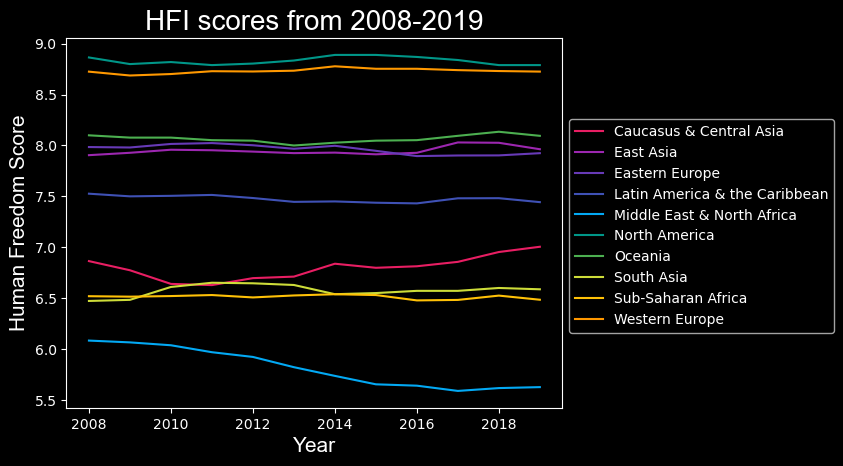

In [251]:
# plotting by region. try this for a simpler version of the dfme plot

labels = ["Caucasus & Central Asia", "East Asia", "Eastern Europe", "Latin America & the Caribbean", "Middle East & North Africa", "North America", "Oceania",
          "South Asia", "Sub-Saharan Africa", "Western Europe"]
colors = ['#e81e63', '#9c27b0', '#673ab7', '#3f51b5', '#03a9f4',
          '#009688', '#4caf50', '#cddc39', '#ffc107', '#ff9800']

ax = dfregionpivot.plot(color=colors)

ax.legend(bbox_to_anchor=(1.0, 0.8), labels=labels)
# plt.style.use("signature_style_1.ipynb")

plt.title("HFI scores from 2008-2019",
          fontdict={"fontname": "Arial", "fontsize": 20})
plt.xlabel("Year", fontdict={"fontname": "Arial", "fontsize": 15})
plt.ylabel("Human Freedom Score", fontdict={
           "fontname": "Arial", "fontsize": 15})

fig.savefig('regionhfiline.png', dpi=300)

plt.show()


In [252]:
# insert columns for evaluations e.g. "very free", "not free"


In [253]:
# Save and export:

# df3.to_csv("writers.csv", index = False)
dfme.to_excel("dfme.xlsx", index=False)
dfregion.to_excel("dfregion.xlsx", index=False)
# df4.to_csv("df4.txt", index = False, sep = "\t")
